In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X_train = np.loadtxt('decision_tree_dataset/X_train.csv', delimiter=",")
y_train = np.loadtxt('decision_tree_dataset/y_train.csv', delimiter=",").astype(int)
X_test = np.loadtxt('decision_tree_dataset/X_test.csv', delimiter=",")
y_test = np.loadtxt('decision_tree_dataset/y_test.csv', delimiter=",").astype(int)

In [30]:
X_test

array([[57.,  1.,  0., ...,  1.,  1.,  1.],
       [59.,  1.,  3., ...,  1.,  0.,  3.],
       [57.,  1.,  2., ...,  2.,  1.,  3.],
       ...,
       [67.,  0.,  0., ...,  2.,  2.,  2.],
       [58.,  1.,  2., ...,  1.,  0.,  3.],
       [76.,  0.,  2., ...,  1.,  0.,  2.]])

In [31]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1])

In [32]:
class DecisionTree:
    def __init__(self, max_depth=3, loss="gini"):
        self.max_depth = max_depth
        self.loss = loss
        self.tree = None

    def _calculate_loss(self, y):
        """Calculate loss based on the chosen loss function."""
        p_hat = np.mean(y)
        if self.loss == "misclassification":
            return min(p_hat, 1 - p_hat)
        elif self.loss == "gini":
            return p_hat * (1 - p_hat)
        elif self.loss == "entropy":
            if p_hat == 0 or p_hat == 1:
                return 0
            return -p_hat * np.log2(p_hat) - (1 - p_hat) * np.log2(1 - p_hat)

    def _best_split(self, X, y):
        """Find the best split for the data."""
        best_loss = float('inf')
        best_split = None
        n_features = X.shape[1]

        for i in range(n_features):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                y_left = y[X[:, i] <= threshold]
                y_right = y[X[:, i] > threshold]
                
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # weighted loss for the split
                loss_left = self._calculate_loss(y_left)
                loss_right = self._calculate_loss(y_right)
                weighted_loss = (len(y_left) / len(y)) * loss_left + (len(y_right) / len(y)) * loss_right

                if weighted_loss < best_loss:
                    best_loss = weighted_loss
                    best_split = {
                        'feature': i,
                        'threshold': threshold,
                        'left_indices': X[:, i] <= threshold,
                        'right_indices': X[:, i] > threshold
                    }
        return best_split

    def _build_tree(self, X, y, depth):
        """Recursively build the decision tree."""
        y = np.array(y).flatten()

        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            return np.argmax(np.bincount(y))

        best_split = self._best_split(X, y)
        if best_split is None:
            return np.argmax(np.bincount(y)) 

        left_subtree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_subtree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }
        
    def _predict_single(self, x, tree):
            """Predict the class of a single instance."""
            if isinstance(tree, dict):
                feature, threshold = tree['feature'], tree['threshold']
                if x[feature] <= threshold:
                    return self._predict_single(x, tree['left'])
                else:
                    return self._predict_single(x, tree['right'])
            return tree

    def build(self, X, y):
        """Build the decision tree."""
        self.tree = self._build_tree(X, y, 0)

    def predict(self, X):
        """Predict labels for input data X."""
        predictions = [self._predict_single(x, self.tree) for x in X]
        return np.array(predictions)


In [33]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def plot_accuracy(train_acc, test_acc, depths, loss_function):
    plt.plot(depths, train_acc, label='Training Accuracy', marker='o')
    plt.plot(depths, test_acc, label='Test Accuracy', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Depth for {loss_function}')
    plt.legend()
    plt.show()

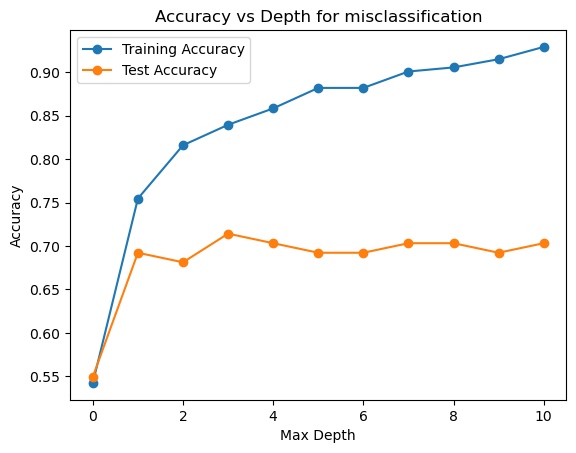

training accuracy for misclassification: [0.5424528301886793, 0.7547169811320755, 0.8160377358490566, 0.839622641509434, 0.8584905660377359, 0.8820754716981132, 0.8820754716981132, 0.9009433962264151, 0.9056603773584906, 0.9150943396226415, 0.9292452830188679]
test accuracy for misclassification: [0.5494505494505495, 0.6923076923076923, 0.6813186813186813, 0.7142857142857143, 0.7032967032967034, 0.6923076923076923, 0.6923076923076923, 0.7032967032967034, 0.7032967032967034, 0.6923076923076923, 0.7032967032967034]


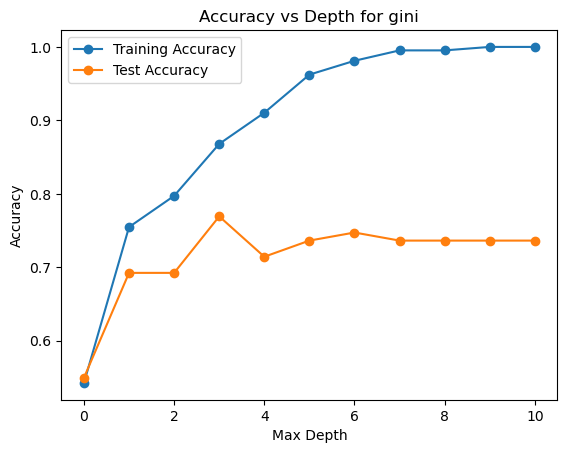

training accuracy for gini: [0.5424528301886793, 0.7547169811320755, 0.7971698113207547, 0.8679245283018868, 0.910377358490566, 0.9622641509433962, 0.9811320754716981, 0.9952830188679245, 0.9952830188679245, 1.0, 1.0]
test accuracy for gini: [0.5494505494505495, 0.6923076923076923, 0.6923076923076923, 0.7692307692307693, 0.7142857142857143, 0.7362637362637363, 0.7472527472527473, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363]


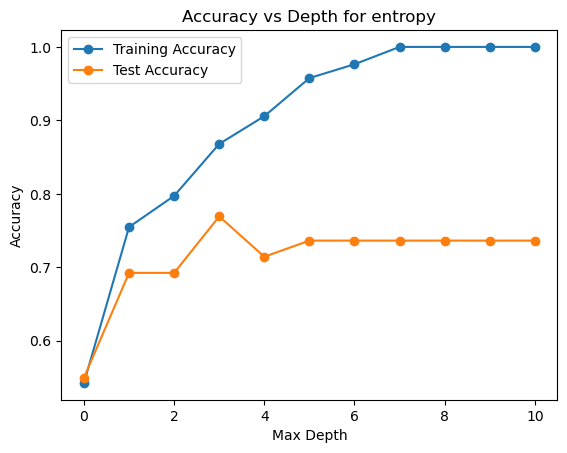

training accuracy for entropy: [0.5424528301886793, 0.7547169811320755, 0.7971698113207547, 0.8679245283018868, 0.9056603773584906, 0.9575471698113207, 0.9764150943396226, 1.0, 1.0, 1.0, 1.0]
test accuracy for entropy: [0.5494505494505495, 0.6923076923076923, 0.6923076923076923, 0.7692307692307693, 0.7142857142857143, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363, 0.7362637362637363]


In [34]:
depths = range(0, 11)
loss_functions = ['misclassification', 'gini', 'entropy']

for loss_func in loss_functions:
    train_acc = []
    test_acc = []
    for depth in depths:
        tree = DecisionTree(max_depth=depth, loss=loss_func)
        tree.build(X_train, y_train)
        y_train_pred = tree.predict(X_train)
        y_test_pred = tree.predict(X_test)
        
        train_acc.append(accuracy(y_train, y_train_pred))
        test_acc.append(accuracy(y_test, y_test_pred))
    
    plot_accuracy(train_acc, test_acc, depths, loss_func)
    print(f"training accuracy for {loss_func}: {train_acc}")
    print(f"test accuracy for {loss_func}: {test_acc}")